##1-A : PCA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler as ss
from sklearn.decomposition import PCA

In [ ]:
urlA='https://media.geeksforgeeks.org/wp-content/uploads/Wine.csv'
df=pd.read_csv(urlA)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
df.isnull().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


In [ ]:
df.shape

(178, 14)

In [ ]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [ ]:
df.replace('?',np.nan)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [ ]:
df.isnull().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


In [ ]:
#likely our feature are hue and color intensity
#target is Customer Segment

In [ ]:
df['Customer_Segment'].unique()

array([1, 2, 3])

In [ ]:
scaler=ss()

In [ ]:
X=df.drop(columns=['Customer_Segment'], axis=1)
y=df['Customer_Segment']

In [ ]:
print(f" X.shape : {X.shape}\t y.shape : {y.shape}")

 X.shape : (178, 13)	 y.shape : (178,)


In [ ]:
X_scaled=scaler.fit_transform(X)

In [ ]:
pca=PCA()
pca.fit(X_scaled)

PCA()

In [ ]:
exp_var=pca.explained_variance_ratio_
cum_var=exp_var.cumsum()

In [ ]:
print(exp_var)

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


In [ ]:
print(cum_var)

[0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


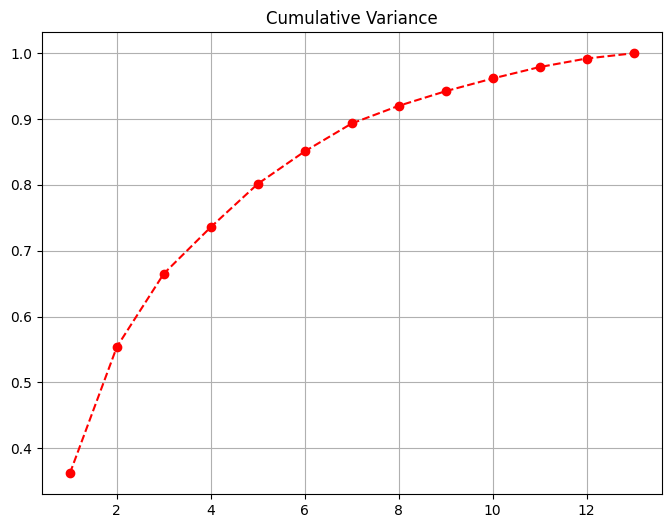

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(range(1,len(cum_var)+1), cum_var, 'ro--')
plt.title("Cumulative Variance")
plt.grid(True)
plt.show()

In [ ]:
ncomp=np.argmax(cum_var>=0.90)+1
ncomp

8

In [ ]:
pca=PCA(n_components=ncomp)
pca_data=pca.fit_transform(X_scaled)
pca_df=pd.DataFrame(pca_data, columns=[f"P{i+1}" for i in range(ncomp)])
pca_df

,P1,P2,P3,P4,P5,P6,P7,P8
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700
...,...,...,...,...,...,...,...,...
173,-3.370524,2.216289,-0.342570,1.058527,-0.574164,1.108788,0.958416,0.146097
174,-2.601956,1.757229,0.207581,0.349496,0.255063,0.026465,0.146894,0.552427
175,-2.677839,2.760899,-0.940942,0.312035,1.271355,-0.273068,0.679235,-0.047024
176,-2.387017,2.297347,-0.550696,-0.688285,0.813955,-1.178783,0.633975,-0.390829


In [ ]:
pca_df['Customer_segment']=y

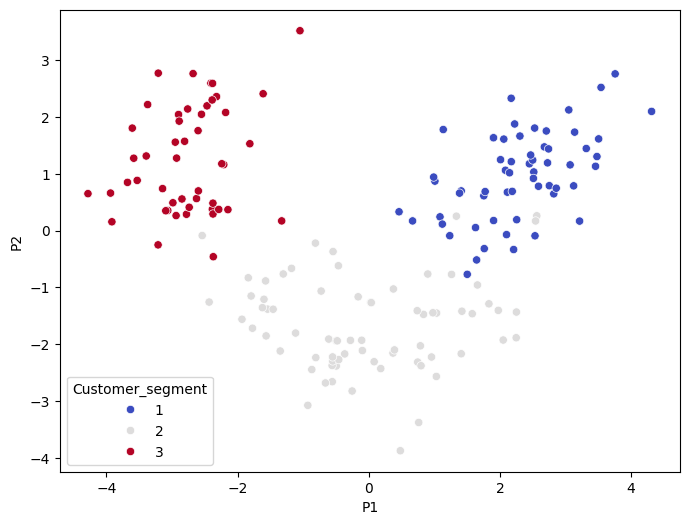

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_df['P1'], y=pca_df['P2'],hue=pca_df['Customer_segment'],palette='coolwarm')
plt.show()

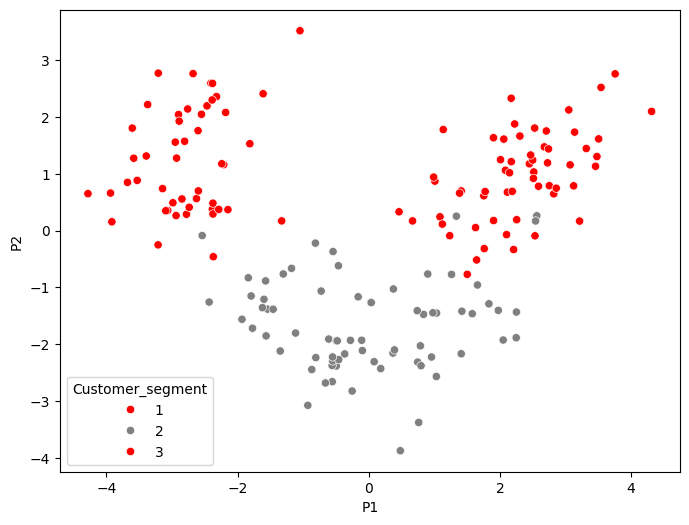

In [ ]:
palette=['red','grey','red']
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_df["P1"], y=pca_df["P2"], hue=pca_df["Customer_segment"], palette=palette)
plt.show()

##1-B - LDA

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score as acc, confusion_matrix as matrix, recall_score as rec
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('Iris.csv')

In [ ]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df.shape

(150, 6)

In [ ]:
df.drop(columns=['Id'], axis=1, inplace=True)

In [ ]:
X=df.drop(columns=['Species'], axis=1)
y=df['Species']

In [ ]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [ ]:
xtr,xts,ytr,yts=train_test_split(X,y,test_size=0.2,random_state=43)

In [ ]:
xtr.shape

(120, 4)

In [ ]:
ytr.shape

(120,)

In [ ]:
xts.shape

(30, 4)

In [ ]:
yts.shape

(30,)

In [ ]:
lda=LinearDiscriminantAnalysis()
lda.fit(xtr,ytr)
ypred=lda.predict(xts)

In [ ]:
ac=acc(yts,ypred)
r=rec(yts,ypred,average='weighted')
cm=matrix(yts,ypred)

In [ ]:
ac

1.0

In [ ]:
r

1.0

In [ ]:
cm

array([[13,  0,  0],
       [ 0,  8,  0],
       [ 0,  0,  9]])

In [ ]:
from sklearn.metrics import classification_report as creport

In [ ]:
report=creport(yts,ypred)

In [ ]:
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



##2-A : Uber

In [ ]:
from sklearn.linear_model import LinearRegression as LR, Ridge as RR, Lasso as LL

In [ ]:
#tts, r2, mse

In [ ]:
df=pd.read_csv('uber.csv')

In [ ]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df['key']=pd.to_datetime(df['key'])
df['weekday']=df['key'].dt.weekday
df['hour']=df['key'].dt.hour
df['day']=df['key'].dt.day
df['month']=df['key'].dt.month
df['year']=df['key'].dt.year

In [ ]:
!pip install geopy
from geopy.distance import great_circle

In [ ]:
def lat(val):
  return val if -90<=val<=90 else np.nan
def lon(val):
  return val if -180<=val<=180 else np.nan


In [ ]:
df['pickup_longitude']=df['pickup_longitude'].apply(lon)
df['dropoff_longitude']=df['dropoff_longitude'].apply(lon)
df['pickup_latitude']=df['pickup_latitude'].apply(lat)
df['dropoff_latitude']=df['dropoff_latitude'].apply(lat)

In [ ]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'weekday', 'hour', 'day',
       'month', 'year'],
      dtype='object')

In [102]:
df.drop(columns=['Unnamed: 0','pickup_datetime'],inplace=True)

In [106]:
def distance(x):
  pick=(x['pickup_latitude'],x['pickup_longitude'])
  drop=(x['dropoff_latitude'],x['dropoff_longitude'])
  return great_circle(pick,drop).km

In [107]:
df.dropna(inplace=True)

In [108]:
df['distance']=df.apply(lambda x : distance(x), axis=1)

In [110]:
df=df[(df['fare_amount']>0)]
df=df[(df['distance']>0)]

In [112]:
df.shape

(194335, 13)

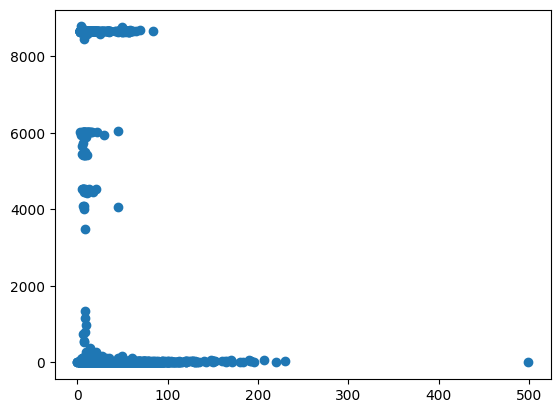

In [113]:
plt.scatter(df['fare_amount'],df['distance'])

In [114]:
def detect_outliers(uber,col_name, lconditions):
  filtered_uber=uber.query(lconditions)
  q1 = filtered_uber[col_name].quantile(0.25)
  q3 = filtered_uber[col_name].quantile(0.75)
  iqr = q3-q1
  lower_bound = q1-1.5*iqr
  upper_bound = q3+1.5*iqr
  outliers=filtered_uber[(filtered_uber[col_name]<lower_bound) | (filtered_uber[col_name]>upper_bound)]
  return lower_bound, upper_bound, outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7cbcf8f2be50>,
 'caps': [<matplotlib.lines.Line2D at 0x7cbcf8f2a980>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cbcf8f2b730>],
 'medians': [<matplotlib.lines.Line2D at 0x7cbd0011cfa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cbcf8f2a140>],
 'means': []}

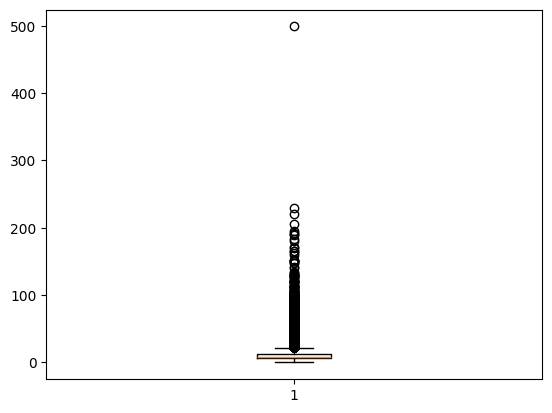

In [115]:
plt.boxplot(df['fare_amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7cbcf9355de0>,
 'caps': [<matplotlib.lines.Line2D at 0x7cbcf93561a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cbcf9355a80>],
 'medians': [<matplotlib.lines.Line2D at 0x7cbcf9355030>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cbcf9354e80>],
 'means': []}

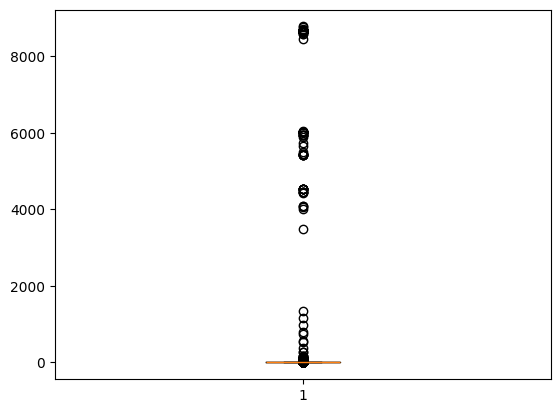

In [116]:
plt.boxplot(df['distance'])

In [119]:
# Detect outliers for fare_amount
fare_lower, fare_upper, fare_outliers = detect_outliers(
    df, 'fare_amount', 'fare_amount > 0'
)
print(f"Fare Amount Bounds: ({fare_lower}, {fare_upper}), Outliers Detected: {fare_outliers.shape[0]}")

# Detect outliers for manhattan_distance_km
distance_lower, distance_upper, distance_outliers = detect_outliers(
    df, 'distance', 'distance > 0'
)
print(f"Distance Bounds: ({distance_lower}, {distance_upper}), Outliers Detected: {distance_outliers.shape[0]}")

# Detect outliers for passenger_count
passenger_lower, passenger_upper, passenger_outliers = detect_outliers(
    df, 'passenger_count', '(passenger_count > 0) & (passenger_count <= 6)'
)
print(f"Passenger Count Bounds: ({passenger_lower}, {passenger_upper}), Outliers Detected: {passenger_outliers.shape[0]}")

#print(f"All outliers : {fare_outliers.shape} , {distance_outliers.shape}")

Fare Amount Bounds: (-3.75, 22.25), Outliers Detected: 16651
Distance Bounds: (-2.735180666509371, 7.976845143890601), Outliers Detected: 16373
Passenger Count Bounds: (-0.5, 3.5), Outliers Detected: 21910


In [121]:
uber_cleaned = df[((df['fare_amount'] > 0) & (df['fare_amount'] < fare_upper)) &
                            ((df['distance'] < distance_upper) & (df['distance'] > 0)) &
                             ((df['passenger_count'] > 0) & (df['passenger_count'] < passenger_upper))]
print(uber_cleaned.shape)
print(uber_cleaned.describe())


(154202, 13)
                                 key    fare_amount  pickup_longitude  \
count                         154202  154202.000000     154202.000000   
mean   2012-03-12 13:05:17.310534656       8.799726        -73.929581   
min    2009-01-01 01:15:22.000000600       0.010000        -75.387785   
25%    2010-08-06 16:28:00.000000512       5.700000        -73.992520   
50%    2012-03-08 21:57:06.500000256       8.000000        -73.982487   
75%    2013-10-10 23:37:53.250000384      11.000000        -73.970408   
max    2015-06-30 23:33:33.000000200      22.200000         40.806012   
std                              NaN       3.968524          2.365580   

       pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
count    154202.000000      154202.000000     154202.000000    154202.000000   
mean         40.703820         -73.928057         40.703890         1.266112   
min         -74.009697         -75.375315        -74.015750         1.000000   
25%      

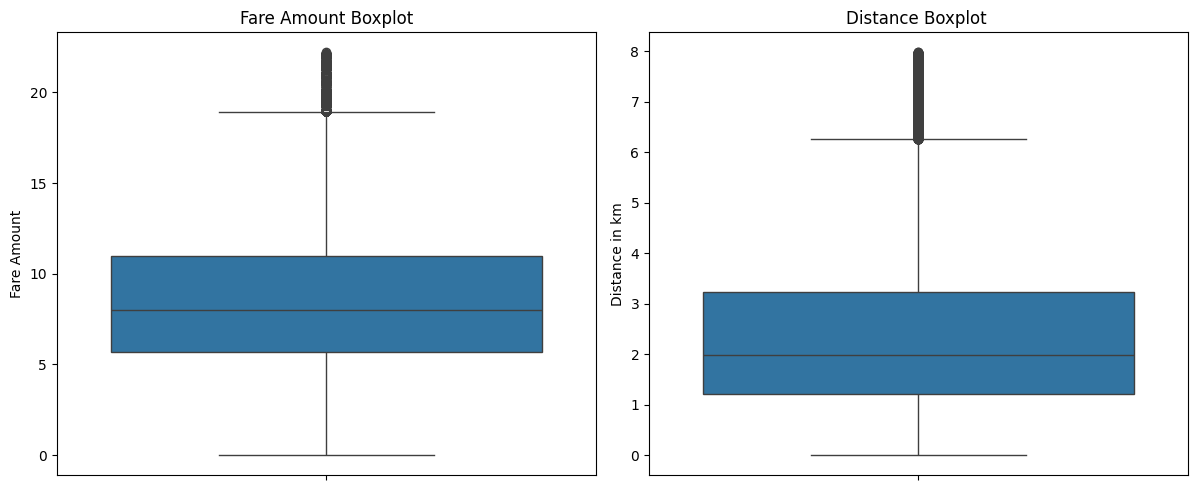

In [123]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.boxplot(data=uber_cleaned, y='fare_amount')
plt.title('Fare Amount Boxplot')
plt.ylabel('Fare Amount')

plt.subplot(1,3,2)
sns.boxplot(data=uber_cleaned, y='distance')
plt.title("Distance Boxplot ")
plt.ylabel('Distance in km')
plt.tight_layout()
plt.show()

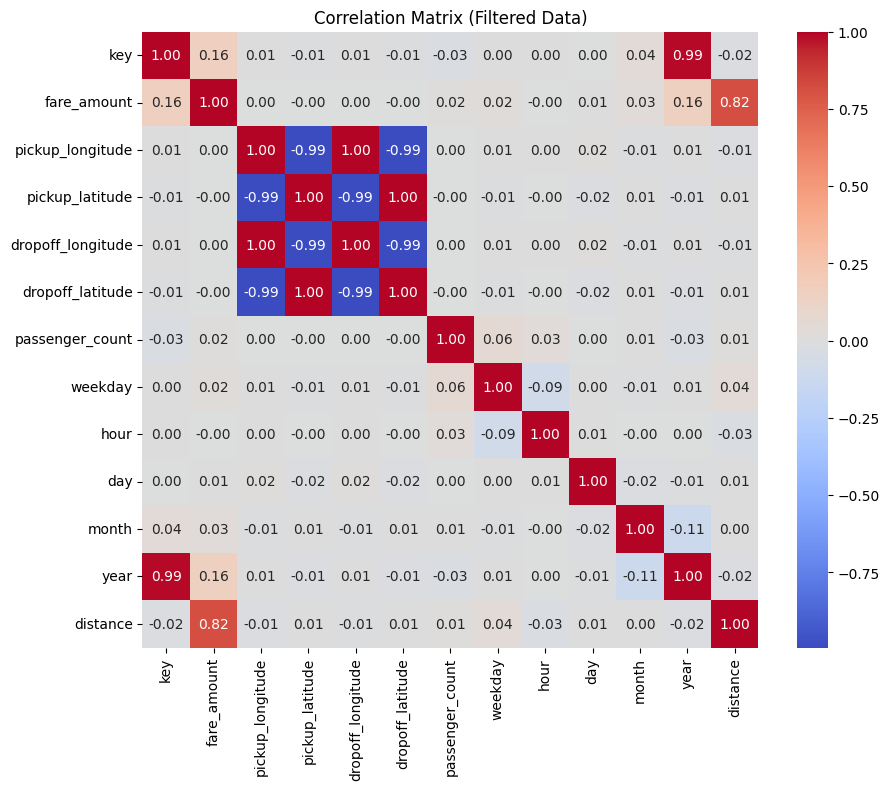

In [124]:
correlation_matrix_filtered = uber_cleaned.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_filtered, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Matrix (Filtered Data)')
plt.show()

In [126]:
X = uber_cleaned[['distance']]
y = uber_cleaned['fare_amount']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [133]:
# Create a Linear Regression model
linear_model = LR()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
linear_rmse = mse(y_test, y_pred_linear, squared=False)
linear_r2 = r2score(y_test, y_pred_linear)

print(f"Linear Regression RMSE: {linear_rmse:.2f}, R^2: {linear_r2:.2f}")

Linear Regression RMSE: 2.28, R^2: 0.67


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [132]:
# Create a Ridge Regression model with a regularization parameter (alpha)
ridge_model = RR(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
ridge_rmse = mse(y_test, y_pred_ridge, squared=False)
ridge_r2 = r2score(y_test, y_pred_ridge)

print(f"Ridge Regression RMSE: {ridge_rmse:.2f}, R^2: {ridge_r2:.2f}")

Ridge Regression RMSE: 2.28, R^2: 0.67


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [131]:
# Create a Lasso Regression model with a regularization parameter (alpha)
lasso_model = LL(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
lasso_rmse = mse(y_test, y_pred_lasso, squared=False)
lasso_r2 = r2score(y_test, y_pred_lasso)

print(f"Lasso Regression RMSE: {lasso_rmse:.2f}, R^2: {lasso_r2:.2f}")

Lasso Regression RMSE: 2.29, R^2: 0.67


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [134]:
# Summary of the results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'RMSE': [linear_rmse, ridge_rmse, lasso_rmse],
    'R^2': [linear_r2, ridge_r2, lasso_r2]
})

print(results)

               Model      RMSE       R^2
0  Linear Regression  2.284979  0.667039
1   Ridge Regression  2.284979  0.667039
2   Lasso Regression  2.285218  0.666970


##2-B : diabetes - univariate, bivariate , multiple regression analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from scipy import stats
from sklearn.linear_model import LinearRegression as LIN, LogisticRegression as LOR
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error as mse, accuracy_score as accscore
from sklearn.metrics import classification_report as creport, r2_score as r2score
from sklearn.metrics import confusion_matrix as cmatrix

In [ ]:
pima=pd.read_csv('/content/pima_indian_diabetes.csv')
df1=pd.read_csv('/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [ ]:
print(pima.shape)
df1.shape

(768, 9)


(70692, 22)

In [ ]:
print(pima.info())
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary    

In [ ]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df1.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df1.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
pima.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df1.isnull().sum()

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [ ]:
#univariate analysis

In [ ]:
cols=pima.columns

In [ ]:
def univariate_analysis(df,cols):
  res={}
  for c in cols:
    res[c]={
    'mean': df[c].mean(),
    'median':df[c].median(),
    'mode':df[c].mode()[0],
    'variance':df[c].var(),
    'std_dev':df[c].std(),
    'skewness':df[c].skew(),
    'kurtosis':df[c].kurtosis()
      }
  return pd.DataFrame(res).T

In [ ]:
res=univariate_analysis(pima,cols)
res2=univariate_analysis(df1,df1.columns)

In [ ]:
res

,mean,median,mode,variance,std_dev,skewness,kurtosis
Pregnancies,3.845052,3.0000,1.000,11.354056,3.369578,0.901674,0.159220
Glucose,120.894531,117.0000,99.000,1022.248314,31.972618,0.173754,0.640780
BloodPressure,69.105469,72.0000,70.000,374.647271,19.355807,-1.843608,5.180157
SkinThickness,20.536458,23.0000,0.000,254.473245,15.952218,0.109372,-0.520072
Insulin,79.799479,30.5000,0.000,13281.180078,115.244002,2.272251,7.214260
BMI,31.992578,32.0000,32.000,62.159984,7.884160,-0.428982,3.290443
DiabetesPedigreeFunction,0.471876,0.3725,0.254,0.109779,0.331329,1.919911,5.594954
Age,33.240885,29.0000,22.000,138.303046,11.760232,1.129597,0.643159
Outcome,0.348958,0.0000,0.000,0.227483,0.476951,0.635017,-1.600930


In [ ]:
res2

,mean,median,mode,variance,std_dev,skewness,kurtosis
Diabetes_binary,0.500000,0.5,0.0,0.250004,0.500004,0.000000,-2.000057
HighBP,0.563458,1.0,1.0,0.245977,0.495960,-0.255908,-1.934566
HighChol,0.525703,1.0,1.0,0.249343,0.499342,-0.102950,-1.989457
CholCheck,0.975259,1.0,1.0,0.024129,0.155336,-6.119271,35.446486
BMI,29.856985,29.0,27.0,50.608339,7.113954,1.719180,7.164081
Smoker,0.475273,0.0,0.0,0.249392,0.499392,0.099031,-1.990249
Stroke,0.062171,0.0,0.0,0.058307,0.241468,3.626499,11.151808
HeartDiseaseorAttack,0.147810,0.0,0.0,0.125964,0.354914,1.984703,1.939102
PhysActivity,0.703036,1.0,1.0,0.208779,0.456924,-0.888732,-1.210190
Fruits,0.611795,1.0,1.0,0.237505,0.487345,-0.458804,-1.789549


In [ ]:
def plotuni(df,cols):
  for c in cols:
    plt.figure(figsize=(12,7))
    plt.subplot(1,2,1)
    sns.histplot(df[c],kde=True)
    plt.title(f"histogram for {c}")

    plt.subplot(1,2,2)
    sns.boxplot(x=df[c])
    plt.title("Box plot for ",c)

    plt.tight_layout()
    plt.show()

In [ ]:
pima.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
pima.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

AttributeError: 'str' object has no attribute 'items'

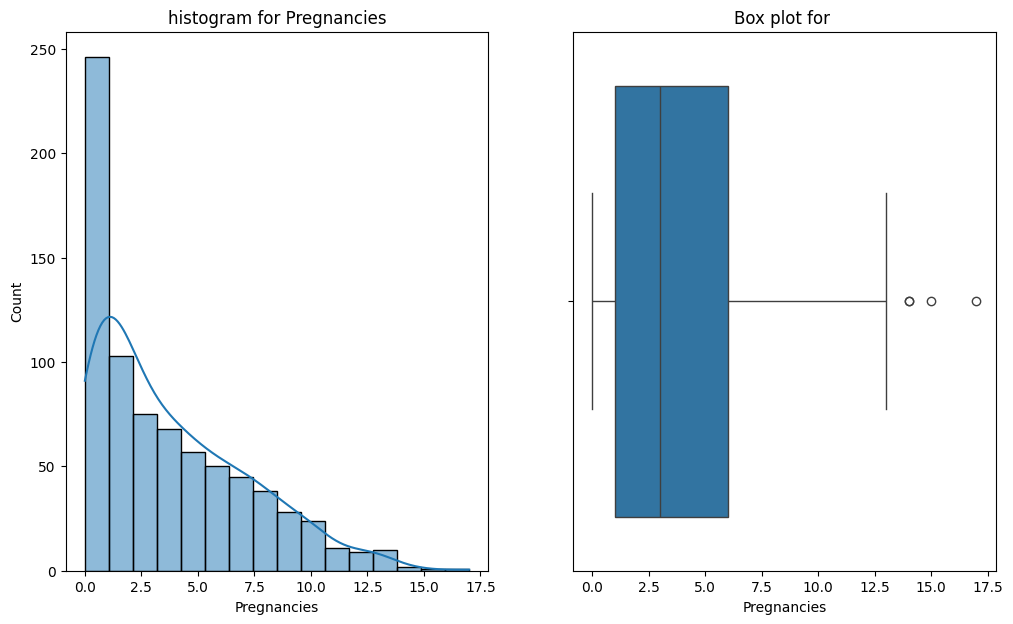

In [ ]:
cols=['Pregnancies',
       'BMI', 'DiabetesPedigreeFunction']
plotuni(pima,cols)

In [ ]:
def detect_outlier(df,cols):
    outlier_info = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        # Store results
        outlier_info[col] = {
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Outliers Detected': len(outliers),
            'Outlier Percent': len(outliers) / len(df) * 100
        }

    return pd.DataFrame(outlier_info).T

In [ ]:
outlier=detect_outlier(pima,cols)
outlier

,Lower Bound,Upper Bound,Outliers Detected,Outlier Percent
Pregnancies,-6.500,13.500,4.0,0.520833
Glucose,37.125,202.125,5.0,0.651042
BloodPressure,35.000,107.000,45.0,5.859375
SkinThickness,-48.000,80.000,1.0,0.130208
Insulin,-190.875,318.125,34.0,4.427083
BMI,13.350,50.550,19.0,2.473958
DiabetesPedigreeFunction,-0.330,1.200,29.0,3.776042
Age,-1.500,66.500,9.0,1.171875
Outcome,-1.500,2.500,0.0,0.000000


In [ ]:
conditions=[
    (pima['Pregnancies']>=0)&(pima['Pregnancies']<=13.5),
    (pima['Glucose'] >= 37.125) & (pima['Glucose'] <= 202.125),
    (pima['BloodPressure'] >= 35) & (pima['BloodPressure'] <= 107),
    (pima['SkinThickness'] >= 0) & (pima['SkinThickness'] <= 80),  # Negative values are invalid for skin thickness
    (pima['Insulin'] >= 0) & (pima['Insulin'] <= 318.125),  # Negative insulin values invalid
    (pima['BMI'] >= 13.35) & (pima['BMI'] <= 50.55),
    (pima['DiabetesPedigreeFunction'] >= 0) & (pima['DiabetesPedigreeFunction'] <= 1.2),
    (pima['Age'] >= 0) & (pima['Age'] <= 66.5)  # Set lower bound to 0, upper based on IQR
]


In [ ]:
combinedcond=conditions[0]
for cond in conditions[1:]:
  combinedcond&=cond

In [ ]:
filtered=pima[combinedcond]
filtered.shape

(639, 9)

In [ ]:
newcol=['Pregnancies','Glucose','BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [ ]:
newout=detect_outlier(filtered,newcol)
newout

,Lower Bound,Upper Bound,Outliers Detected,Outlier Percent
Pregnancies,-6.500,13.500,0.0,0.000000
Glucose,42.000,194.000,7.0,1.095462
BloodPressure,40.000,104.000,4.0,0.625978
SkinThickness,-48.000,80.000,0.0,0.000000
Insulin,-180.000,300.000,3.0,0.469484
BMI,14.325,48.925,4.0,0.625978
DiabetesPedigreeFunction,-0.274,1.102,12.0,1.877934
Age,0.000,64.000,6.0,0.938967


In [ ]:
filtered[newcol].agg(['min','max'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
min,0,44,38,0,0,18.2,0.078,21
max,13,198,106,60,318,50.0,1.191,66


In [ ]:
#bivariate Analysis

In [ ]:
predictors=newcol
y = filtered['Outcome']
res={}
for pred in predictors:
  X=filtered[[pred]]
  X=sm.add_constant(X)
  model=sm.OLS(y,X).fit()
  res[pred]=model.summary()
for pred,r in res.items():
  print(f"Results for {pred}")
  print(r)
  print()

Results for Pregnancies
                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     34.93
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           5.58e-09
Time:                        19:31:21   Log-Likelihood:                -398.58
No. Observations:                 639   AIC:                             801.2
Df Residuals:                     637   BIC:                             810.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1896    

In [ ]:
#multiple regression

In [ ]:
X=filtered.drop('Outcome',axis=1)
y=filtered['Outcome']

In [ ]:
xtr,xts,ytr,yts=tts(X,y,test_size=0.2,random_state=43)

In [ ]:
lin=LIN()
lin.fit(xtr,ytr)
ypred=lin.predict(xts)
mselin=mse(yts,ypred)
r2=r2score(yts,ypred)

In [ ]:
lor=LOR(max_iter=1000)
lor.fit(xtr,ytr)
ylor=lor.predict(xts)

In [ ]:
lormse=mse(yts,ylor)

In [ ]:
r2lor=r2score(yts,ylor)

In [ ]:
X1=df1[['GenHlth']]

In [ ]:
y1=df1[['Diabetes_binary']]

In [ ]:
xtr,xts,ytr,yts=tts(X1,y1,test_size=0.2,random_state=43)

In [ ]:
lor.fit(xtr,ytr)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [ ]:
ypred2=lor.predict(xts)

In [ ]:
print(creport(yts,ypred2))

              precision    recall  f1-score   support

         0.0       0.73      0.58      0.65      7144
         1.0       0.65      0.78      0.71      6995

    accuracy                           0.68     14139
   macro avg       0.69      0.68      0.68     14139
weighted avg       0.69      0.68      0.68     14139



#just compare acc of 2 datasets

#optional :

In [ ]:
features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Income', 'Education']


In [ ]:
res={}
for i in features:
  X1=df1[[i]]
  y1=y1
  lor=LOR(max_iter=1000)
  xtr,xts,ytr,yts=tts(X1,y1,test_size=0.2,random_state=42)
  lor.fit(xtr,ytr)
  ypred=lor.predict(xts)

  acc=accscore(yts,ypred)
  r2=r2score(yts,ypred)
  rep=creport(yts,ypred)
  cm=cmatrix(yts,ypred)
  #recs=recscore(yts,ypred)

  res[i]={
      'Name':i,
      'Accuracy': acc,
      'R2_Score' : r2,
      #'Recall' : recs,
      'Confusion_Matrix' :cm,
      'Classification_Report':rep,
      'ypred':ypred,
      'yts':yts
  }
print(res)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

{'BMI': {'Name': 'BMI', 'Accuracy': 0.6432562416012448, 'R2_Score': -0.42698703274139294, 'Confusion_Matrix': array([[4979, 2111],
       [2933, 4116]]), 'Classification_Report': '              precision    recall  f1-score   support\n\n         0.0       0.63      0.70      0.66      7090\n         1.0       0.66      0.58      0.62      7049\n\n    accuracy                           0.64     14139\n   macro avg       0.65      0.64      0.64     14139\nweighted avg       0.65      0.64      0.64     14139\n', 'ypred': array([0., 1., 0., ..., 0., 0., 1.]), 'yts':        Diabetes_binary
44967              1.0
20220              0.0
23944              0.0
2707               0.0
42356              1.0
...                ...
59313              1.0
44805              1.0
30661              0.0
30295              0.0
30199              0.0

[14139 rows x 1 columns]}, 'GenHlth': {'Name': 'GenHlth', 'Accuracy': 0.6847018883938044, 'R2_Score': -0.2612030515386854, 'Confusion_Matrix': array([[4

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##Prac - 3 A : SVM

In [ ]:
import pandas as pd

In [ ]:
import sklearn

In [ ]:
from sklearn.model_selection import train_test_split as tts
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [ ]:
digits=datasets.load_digits()

In [ ]:
X=digits.data
y=digits.target

In [ ]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [ ]:
X.shape

(1797, 64)

In [ ]:
y.shape

(1797,)

In [ ]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [ ]:
xtr,xts,ytr,yts=tts(X,y,test_size=0.3,random_state=43)

In [ ]:
svm=SVC(kernel='linear',C=1.0)
svm.fit(xtr,ytr)
lpred=svm.predict(xts)

In [ ]:
lacc=accuracy_score(yts,lpred)

In [ ]:
svm=SVC(kernel='rbf',gamma='scale',C=1.0)
svm.fit(xtr,ytr)
rpred=svm.predict(xts)
racc=accuracy_score(yts,rpred)

In [ ]:
lacc

0.9722222222222222

In [ ]:
racc

0.9777777777777777

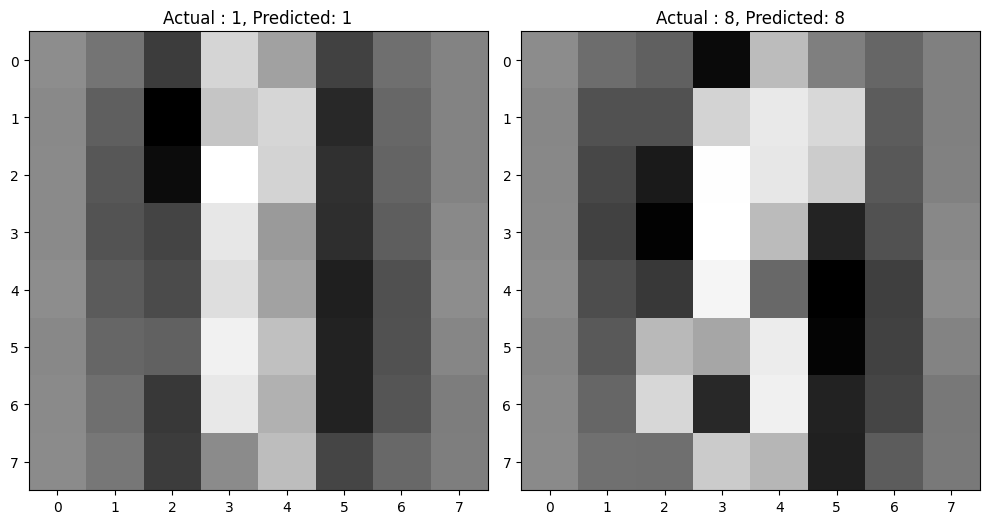

In [ ]:
plt.figure(figsize=(10,12))
plt.subplot(1,2,1)
plt.imshow(xts[0].reshape(8,8), cmap='grey')
plt.title(f"Actual : {yts[0]}, Predicted: {lpred[0]}")

plt.subplot(1,2,2)
plt.imshow(xts[1].reshape(8,8), cmap='grey')
plt.title(f"Actual : {yts[1]}, Predicted: {lpred[1]}")
plt.tight_layout()
plt.show()

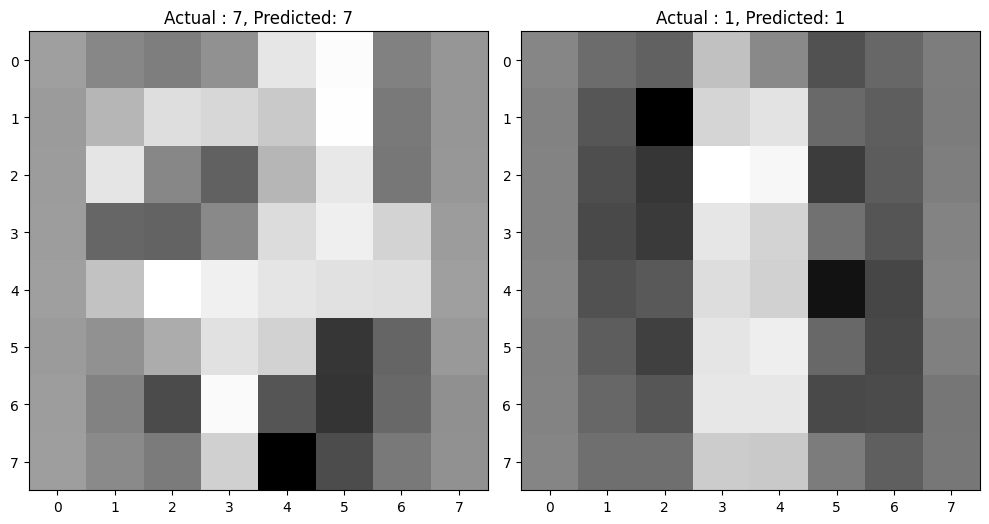

In [ ]:
plt.figure(figsize=(10,12))
plt.subplot(1,2,1)
plt.imshow(xts[10].reshape(8,8), cmap='grey')
plt.title(f"Actual : {yts[10]}, Predicted: {rpred[10]}")

plt.subplot(1,2,2)
plt.imshow(xts[11].reshape(8,8), cmap='grey')
plt.title(f"Actual : {yts[11]}, Predicted: {rpred[11]}")
plt.tight_layout()
plt.show()

In [ ]:
#hyper parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params=[
    {
        'kernel':['linear'],
        'C': [0.1,1,10,100]
    },
    {
        'kernel':['rbf'],
        'gamma': [0.001,0.01,0.1,1],
        'C': [0.1,1,10,100]
    }
]

In [ ]:
grid=GridSearchCV(SVC(),params,verbose=2,scoring='accuracy',cv=5,n_jobs=-1)

In [ ]:
grid.fit(xtr,ytr)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']}],
             scoring='accuracy', verbose=2)

In [ ]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
model=grid.best_estimator_

In [ ]:
bestpred=model.predict(xts)

In [ ]:
bestacc=accuracy_score(yts,bestpred)
bestacc

0.9777777777777777

In [ ]:
print(classification_report(yts,bestpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       0.91      1.00      0.95        41
           2       0.98      0.98      0.98        45
           3       0.98      0.98      0.98        41
           4       0.97      1.00      0.98        57
           5       0.98      0.98      0.98        54
           6       1.00      1.00      1.00        60
           7       0.96      1.00      0.98        55
           8       1.00      0.91      0.95        66
           9       0.98      0.95      0.97        63

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



##3-B KNN

In [ ]:
df=pd.read_csv('Social_Network_Ads.csv')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import accuracy_score as accscore, recall_score as recscore, f1_score as f1score, classification_report as creport, precision_score as prescore, confusion_matrix as conmatrix

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
df.drop(columns=['User ID'],axis=1,inplace=True)

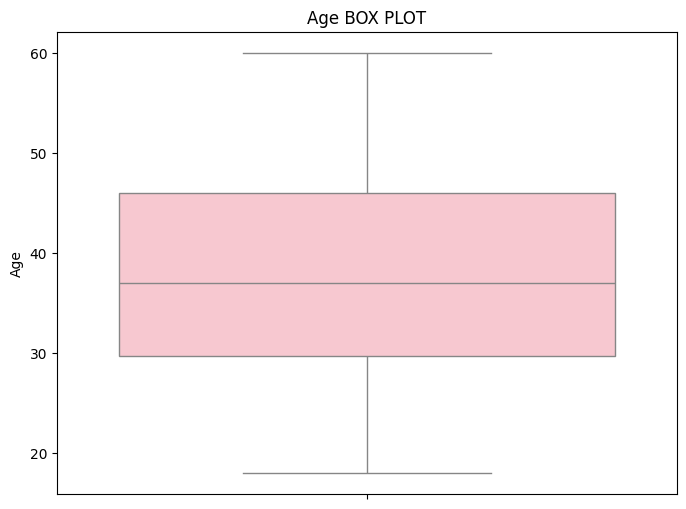

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(df,y='Age',color='Pink')
plt.title("Age BOX PLOT")
plt.show()

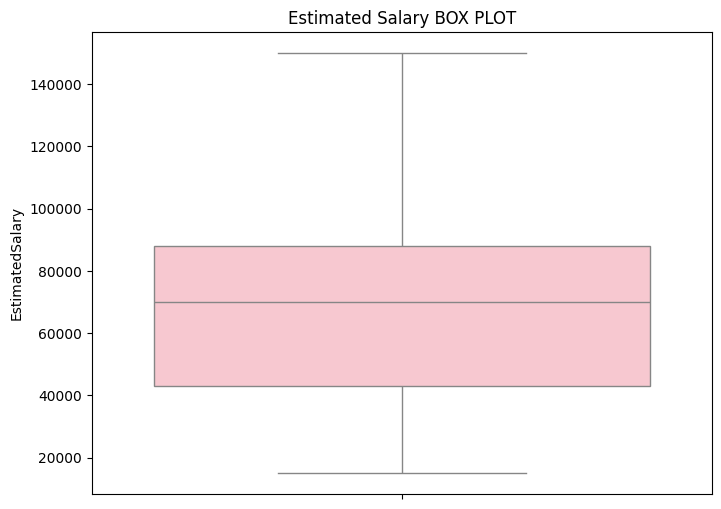

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(df,y='EstimatedSalary',color='Pink')
plt.title("Estimated Salary BOX PLOT")
plt.show()

In [ ]:
scaler=StandardScaler()
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [ ]:
X=df.drop(columns=['Purchased'],axis=1)
y=df['Purchased']

In [ ]:
X=scaler.fit_transform(X)

In [ ]:
xtr,xts,ytr,yts=tts(X,y,test_size=0.3,random_state=42)

In [ ]:
knn=knc(n_neighbors=8,metric='minkowski',p=2)

In [ ]:
knn.fit(xtr,ytr)
ypred=knn.predict(xts)

In [ ]:
acc=accscore(yts,ypred)

In [ ]:
acc

0.9333333333333333

In [ ]:
error=1-acc

In [ ]:
error

0.06666666666666665

## 4-A : K means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df=pd.read_csv('Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
df.drop(columns=['Id','Species'],axis=1,inplace=True)

In [ ]:
df.shape

(150, 4)

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
outliers=((df<lower)|(df>upper)).sum()
outliers

,0
SepalLengthCm,0
SepalWidthCm,4
PetalLengthCm,0
PetalWidthCm,0


In [ ]:
df=df[~((df<lower)|(df>upper)).any(axis=1)]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.shape

(146, 4)

In [ ]:
#outliers removed

In [ ]:
scaler=StandardScaler()

In [ ]:
df_cleaned=scaler.fit_transform(df)
df_cleaned=pd.DataFrame(df_cleaned,columns=df.columns)

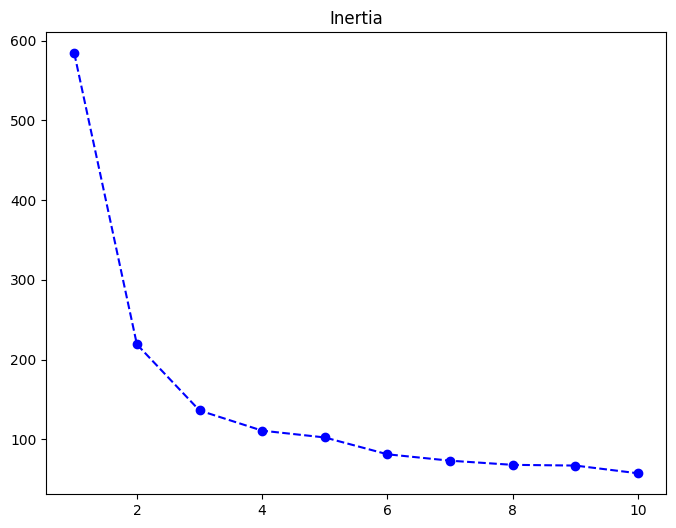

In [ ]:
K=range(1,11)
inertia=[]

for k in K:
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(df_cleaned)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K,inertia,'bo--')
plt.title("Inertia")
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=3,random_state=42)
df_cleaned['Cluster3']=kmeans.fit_predict(df_cleaned)

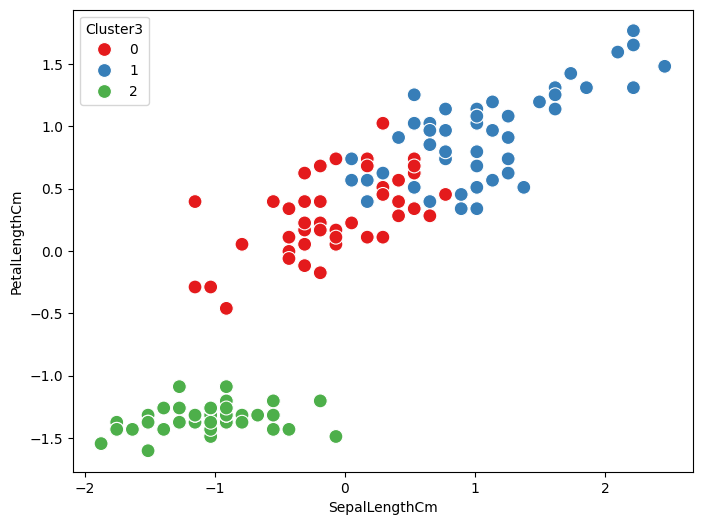

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',data=df_cleaned,hue='Cluster3',s=100,palette='Set1')
plt.show()

##4-B : K mediods

In [ ]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.5 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids

In [ ]:
df=pd.read_csv('CC_GENERAL.csv')

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
df.dtypes

,0
CUST_ID,object
BALANCE,float64
BALANCE_FREQUENCY,float64
PURCHASES,float64
ONEOFF_PURCHASES,float64
INSTALLMENTS_PURCHASES,float64
CASH_ADVANCE,float64
PURCHASES_FREQUENCY,float64
ONEOFF_PURCHASES_FREQUENCY,float64
PURCHASES_INSTALLMENTS_FREQUENCY,float64


In [ ]:
df.drop('CUST_ID',axis=1,inplace=True)

In [ ]:
df.fillna(df.mean(),inplace=True)

In [ ]:
df.isnull().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


In [ ]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
outlier=((df<lower)|(df>upper)).sum()
outlier

,0
BALANCE,695
BALANCE_FREQUENCY,1493
PURCHASES,808
ONEOFF_PURCHASES,1013
INSTALLMENTS_PURCHASES,867
CASH_ADVANCE,1030
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,782
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,525


In [ ]:
df=df[~((df<lower)|(df>upper)).any(axis=1)]

In [ ]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
14,2772.772734,1.000000,0.00,0.00,0.00,346.811390,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,805.647974,989.962866,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8738,981.286008,1.000000,1370.00,1370.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1400.0,596.685481,451.584847,0.000000,12
8742,87.026009,1.000000,605.52,0.00,605.52,0.000000,1.000000,0.000000,0.916667,0.000000,0,12,1500.0,511.637312,175.012705,0.000000,12
8747,16.428326,0.909091,441.50,124.70,316.80,0.000000,1.000000,0.166667,0.916667,0.000000,0,14,1000.0,482.547848,91.328536,0.333333,12
8759,67.377243,1.000000,295.00,0.00,295.00,0.000000,0.500000,0.000000,0.416667,0.000000,0,6,1000.0,245.689379,167.126034,0.300000,12


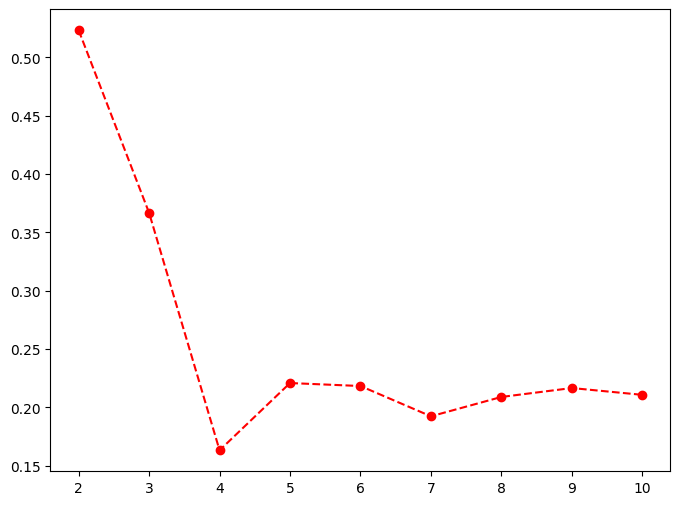

In [ ]:
K=range(2,11)
silscore=[]

for k in K:
  ac=KMedoids(n_clusters=k,random_state=42)
  cluster_labels=ac.fit_predict(df)
  score=silhouette_score(df,cluster_labels)
  silscore.append(score)

plt.figure(figsize=(8,6))
plt.plot(K,silscore,'ro--')
plt.show()

In [ ]:
k=2
Km=KMedoids(n_clusters=k,random_state=42)
df['Cluster']=Km.fit_predict(df)


<ipython-input-250-23918a666828>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster']=Km.fit_predict(df)


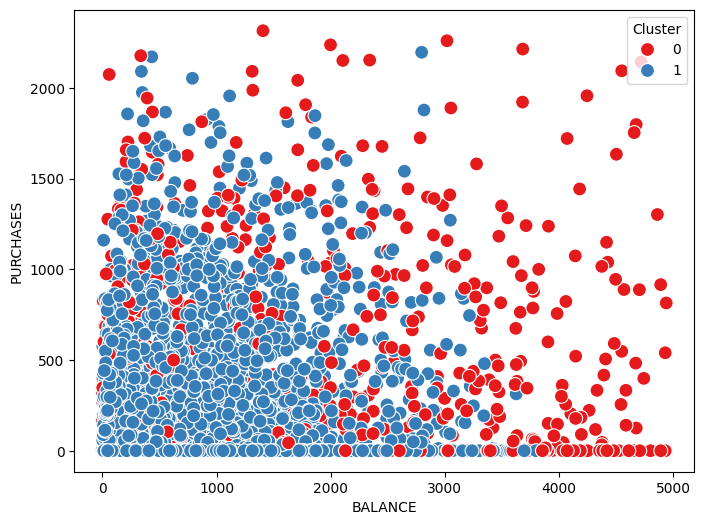

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='BALANCE',y='PURCHASES',data=df,s=100,hue='Cluster',palette='Set1')
plt.show()

##5-A : Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [ ]:
df=pd.read_csv('car_evaluation.csv')

In [ ]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
df.isnull().sum()

,0
vhigh,0
vhigh.1,0
2,0
2.1,0
small,0
low,0
unacc,0


In [ ]:
df.columns=['Bprice','maintainencecost','doors','persons','lug_boot','safety','decision']

In [ ]:
df.head()

,Bprice,maintainencecost,doors,persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
df.shape

(1727, 7)

In [ ]:
df.columns

Index(['Bprice', 'maintainencecost', 'doors', 'persons', 'lug_boot', 'safety',
       'decision'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Bprice,0
maintainencecost,0
doors,0
persons,0
lug_boot,0
safety,0
decision,0


In [ ]:
le=LabelEncoder()

In [ ]:
for col in df.columns:
  df[col]=le.fit_transform(df[col])

In [ ]:
df.head()

,Bprice,maintainencecost,doors,persons,lug_boot,safety,decision
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [ ]:
X=df.drop('decision',axis=1)
y=df['decision']

In [ ]:
xtr,xts,ytr,yts=tts(X,y,test_size=0.2,random_state=42)

In [ ]:
rf=RFC(n_estimators=1000, random_state=42)

In [ ]:
rf.fit(xtr,ytr)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [ ]:
ypred=rf.predict(xts)

In [ ]:
acc=accuracy_score(yts,ypred)
acc

0.9624277456647399

In [ ]:
print(classification_report(yts,ypred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        77
           1       0.91      0.67      0.77        15
           2       0.99      1.00      0.99       237
           3       0.79      0.88      0.83        17

    accuracy                           0.96       346
   macro avg       0.91      0.87      0.88       346
weighted avg       0.96      0.96      0.96       346



##5-B : Adaboost, XGBoost, Gradient Tree Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier as ABC, GradientBoostingClassifier as GBC, VotingClassifier as VC

In [ ]:
from xgboost import XGBClassifier as XGB

In [ ]:
df=pd.read_csv("Iris.csv")

In [ ]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df.shape

(150, 6)

In [ ]:
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
X=df.drop('Species',axis=1)
y=df['Species']

In [ ]:
xtr,xts,ytr,yts=tts(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
ada=ABC(n_estimators=1000,random_state=42)

In [ ]:
ada.fit(xtr,ytr)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=1000, random_state=42)

In [ ]:
adapred=ada.predict(xts)

In [ ]:
grad=GBC(n_estimators=1000,random_state=42)

In [ ]:
grad.fit(xtr,ytr)
gradpred=grad.predict(xts)

In [ ]:
xgbc=XGB(n_estimators=1000, use_label_encoder=False, eval_metrics='mlogloss', random_state=42)

In [ ]:
xgbc.fit(xtr,ytr)
xgbpred=xgbc.predict(xts)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:24:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
accxgb=accuracy_score(yts,xgbpred)
accxgb

1.0

In [ ]:
#compare acc and report

##6-Maze

In [136]:
import numpy
import random
import matplotlib.pyplot as plt
import pandas as pd

In [137]:
maze=np.array([
    [1,1,1,1,1,1],
    [1, 2, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 1],
    [1, 0, 1, 0, 0, 1],
    [1, 0, 0, 0, 3, 1],
    [1, 1, 1, 1, 1, 1]
])
def plot_maze(maze):
  plt.imshow(maze,cmap='coolwarm')
  plt.title("Maze environment")
  plt.show()

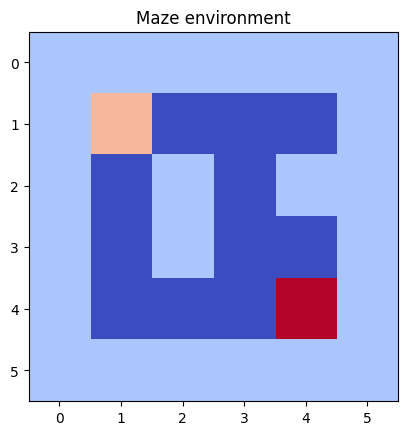

In [138]:
plot_maze(maze)

In [142]:
rows,cols=maze.shape
qtable=np.zeros((rows,cols,4))
learningrate=0.1
discount=0.9
epsilon=1.0
max_epsilon=1.0
min_epsilon=0.01
decay_rate=0.005

In [143]:
actions=['up','down','left','right']
def get_reward(state):
  if maze[state]==3:
    return 100
  elif maze[state==1]:
    return -100
  else:
    return -1


In [144]:
def take_action(state,action):
  row,col=state
  if action=='up' and row>0:
    row-=1
  elif action=='down' and row<rows-1:
    row+=1
  elif action=='right' and col<cols-1:
    col+=1
  elif action=='left' and col>0:
    col-=1
  new_state=(row,col)
  if maze[new_state]==1:
    return state
  return new_state

In [149]:
episdes=1000
steps=100
#action_idx=0
for epi in range(episdes):
  state=tuple(np.argwhere(maze==2)[0])
  total_rewards=0
  for step in range(steps):
    if random.uniform(0,1)<epsilon:
      action_idx=random.randint(0,3)
    else:
      action_idx=np.argmax(qtable[state])

    action=actions[action_idx]
    new_state=take_action(state,action)
    reward=get_reward(new_state)

    best_future_q = np.max(qtable[new_state])
    qtable[state][action_idx]+=learningrate*(reward+discount*best_future_q - qtable[state][action_idx])
    state=new_state
    total_rewards+=reward

    if maze[state]==3:
      break
    epsilon=min_epsilon + (max_epsilon-min_epsilon)* np.exp(-decay_rate*epi)

<ipython-input-143-c56132be9605>:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  elif maze[state==1]:


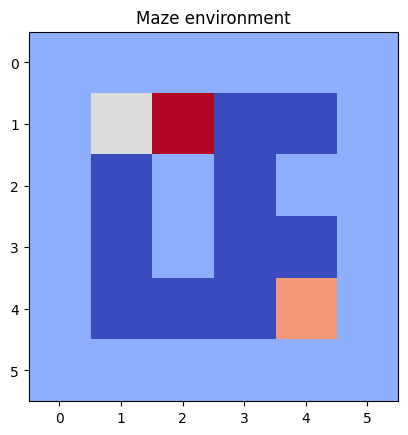

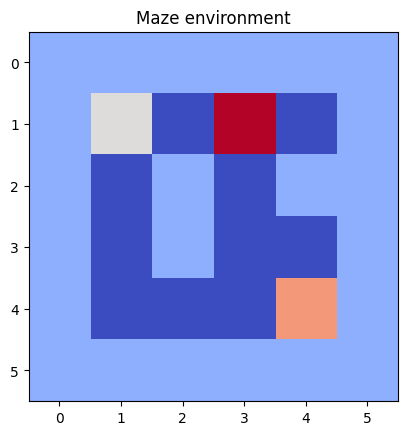

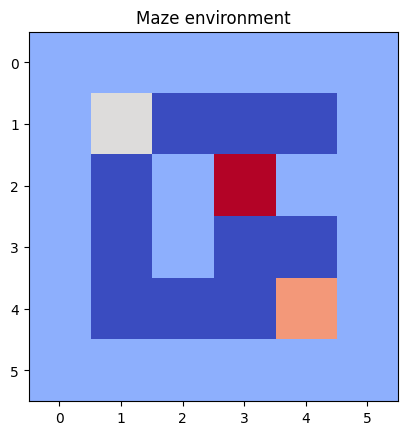

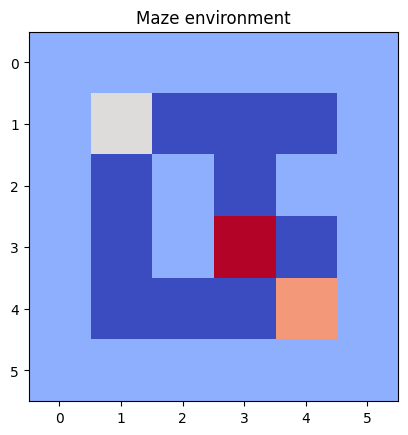

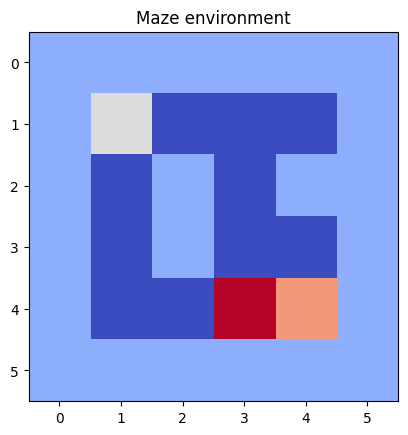

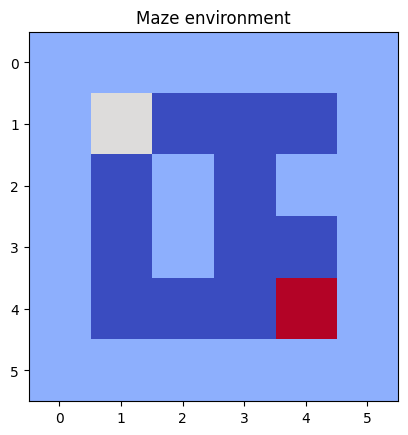

In [153]:
def test_agent():
  state=tuple(np.argwhere(maze==2)[0])
  step=0

  while maze[state]!=3 and step<steps:
    action_idx=np.argmax(qtable[state])
    action=actions[action_idx]
    state=take_action(state,action)
    step+=1

    maze_copy=maze.copy()
    maze_copy[state]=4
    plot_maze(maze_copy)
test_agent()